In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from data_cleaner import clean_df

# Hive mind activation
![](https://media.giphy.com/media/26gR0BZV9XBavwbyE/giphy.gif)

Documenting best practices:

In groups: [article 1](https://www.jackhagley.com/What-s-the-difference-between-an-Infographic-and-a-Data-Visualisation), [article 2](https://thoughtbot.com/blog/analyzing-minards-visualization-of-napoleons-1812-march), [article 3](http://dataremixed.com/2016/04/the-design-of-everyday-visualizations/), [article 4](https://visme.co/blog/data-storytelling-tips/), [article 5](https://www.tableau.com/learn/articles/best-beautiful-data-visualization-examples)

To fill in: [Best practices doc](https://docs.google.com/document/d/1Jg_Nwa8K9uCMppSPtmzpHvmJ-dLkRLOfyXJMNxNSoJo/edit#) 

In [ ]:
# Anscombe Quartet

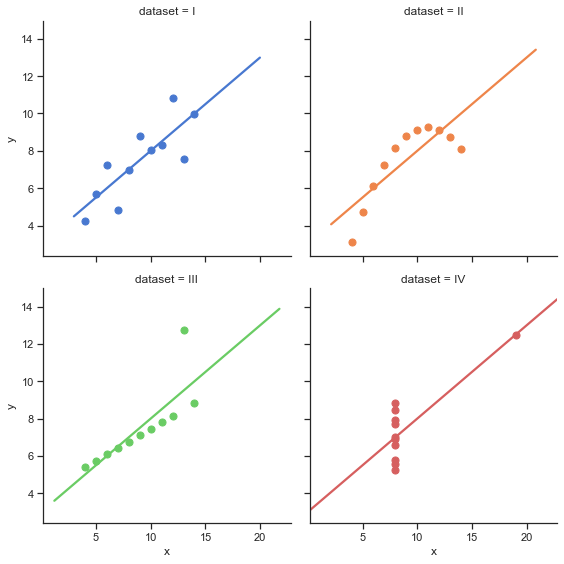

In [14]:
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

In [ ]:
# Let's reimport the animal and heart data we have been working with
# along with our cleaner.

In [15]:
animal_df = clean_df(pd.read_csv('../day_2/animals.csv'))
animal_df.head()

,Animal ID,Name,DateTime,Date of Birth,Outcome Type,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,age_at_outcome,days_at_outcome,combined_outcome
0,A789027,Lennie,2019-02-17 11:44:00,2017-02-13,Adoption,Dog,Neutered Male,2 years,Chihuahua Shorthair Mix,Cream,734 days 11:44:00,734,Adoption
1,A720371,Moose,2016-02-13 17:59:00,2015-10-08,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,128 days 17:59:00,128,Adoption
2,A674754,no_name,2014-03-18 11:47:00,2014-03-12,Transfer,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6 days 11:47:00,6,Transfer\Partner
3,A689724,*Donatello,2014-10-18 18:52:00,2014-08-01,Adoption,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black,78 days 18:52:00,78,Adoption
4,A680969,*Zeus,2014-08-05 16:59:00,2014-06-03,Adoption,Cat,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby,63 days 16:59:00,63,Adoption


In [16]:
#!curl https://www.kaggle.com/ronitf/heart-disease-uci. -o "heart.csv"
heart_df = pd.read_csv('../day_1/heart.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Briefly back to our task of plotting our data by month of outcome.

Text(0.5, 1.0, 'Outcomes by month in Austin animal shelter')

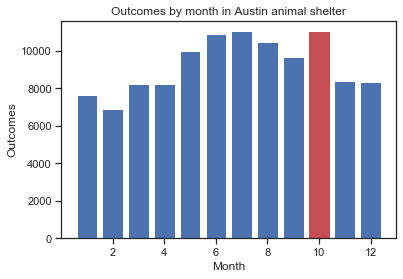

In [25]:
animal_df['months'] = animal_df.DateTime.apply(lambda x: x.month)
values, counts = np.unique(animal_df.months, return_counts=True)
animal_bar= plt.bar(x = values, height = counts)
animal_bar[9].set_color('r') #Let's mess around with the color
plt.xlabel('Month')
plt.ylabel('Outcomes')
plt.title('Outcomes by month in Austin animal shelter')

### Histogram Revisited
Histograms are like barplots in the sense that it describe __one-dimensional__ data. A histogram divides the variable into bins, counts the number of observations in each bin, and shows the bins on the x-axis and the frequency on the y-axis. It is used for visualizing __continuous__ variables. <br>

From the documentation: compute and draw the histogram of x. The return value is a tuple (__n, bins, patches__) or ([n0, n1, ...], bins, [patches0, patches1,...]) if the input contains multiple data.

Comparison of barplots and histogram
<img src='img/hist.png'>

In [ ]:
# Knowledge check? 
# How can I make an approximately equivalent plot of the months plot
# using one of our histogram plots: df.hist(), plt.hist(), sns.distplot()


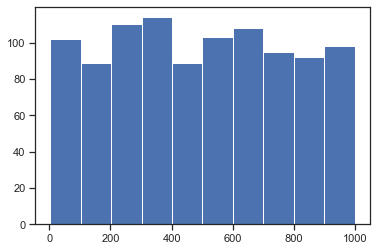

In [26]:
# When we create a histogram of random integers, it is not very interesting!
numbers = np.random.randint(1,1000, size = 1000) 
plt.hist(numbers, bins = 10)
plt.show()

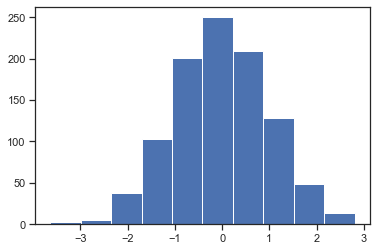

In [27]:
numbers = np.random.normal(0, 1, 1000)
plt.hist(numbers, bins = 10) # if we change the bin numbers, it will look smoother
plt.show()

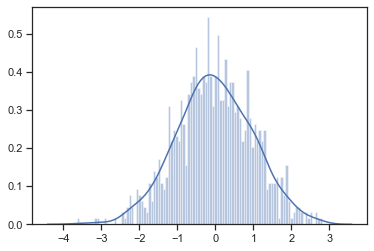

In [28]:
sns.distplot(numbers, bins = 100)

In [29]:
# Extra: if I take the mean of random subsets of random numbers
# what would the distribution look like?
# let's try!

mean_list = []



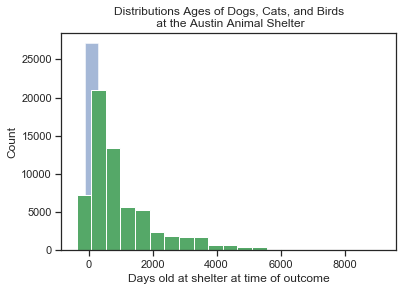

In [30]:
dog_df = animal_df[animal_df['Animal Type'] == 'Dog']
cat_df = animal_df[animal_df['Animal Type'] == 'Cat']
bird_df = animal_df[animal_df['Animal Type'] == 'Bird']

n, bins, patches = plt.hist(cat_df['days_at_outcome'], bins=20, alpha = .5)
plt.hist(bird_df['days_at_outcome'], bins=30)
# plt.setp(patches[1], 'facecolor', 'red') # set a patchcolor to show a specific bin
plt.hist(dog_df['days_at_outcome'], bins=20) # alpha can be toggled to show overlapping data
plt.title("Distributions Ages of Dogs, Cats, and Birds\n at the Austin Animal Shelter")
plt.xlabel('Days old at shelter at time of outcome')
plt.ylabel('Count')
plt.show()

In [ ]:
## let's look at the Seaborn equivalent

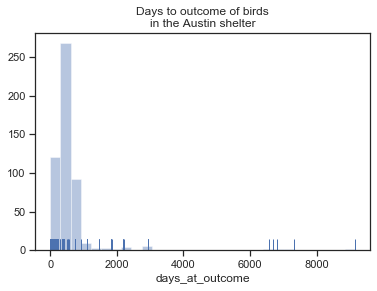

In [31]:
sns.distplot(bird_df['days_at_outcome'], bins = 30, 
             kde = False,  # toggle KDE to include kernal density line 
             rug = True) # toggle rug to show ticks of elements in bins
plt.title("Days to outcome of birds\nin the Austin shelter")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d774b00>,
      dtype=object)

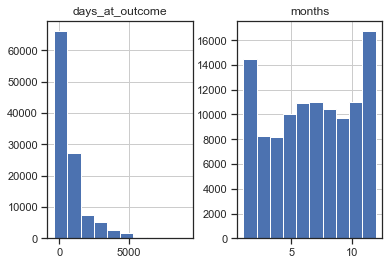

In [32]:
## Another way with Pandas
animal_df.hist()

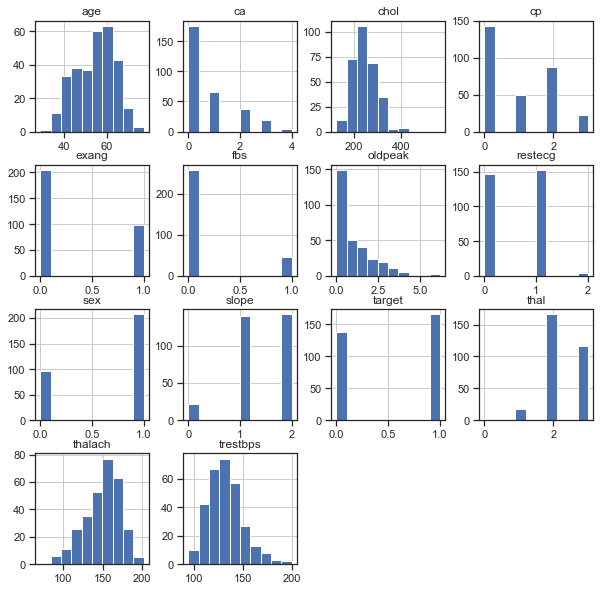

In [33]:
heart_df.hist(figsize=(10,10))

plt.show()

### 2. Boxplots
Boxplots are a very informative type of visualization tool because it allows us to know the distribution of the data. 
<img src='img/boxplot.png'>

In [ ]:
# In a box plot, the median is the center yellow line
# the left end of box is the 25th percentile and right end of box is 75th percentile.
# and the whiskers are by the upper and lower extremes, you can have outliers as single points past these

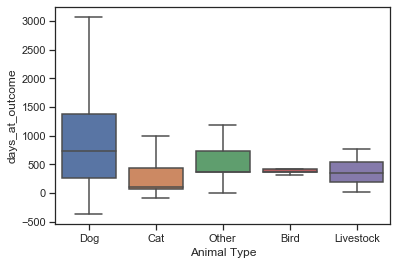

In [56]:
sns.boxplot(x = animal_df['Animal Type'], 
            y= animal_df['days_at_outcome'], showfliers = False)

In [ ]:
# What does this say about our distributions?

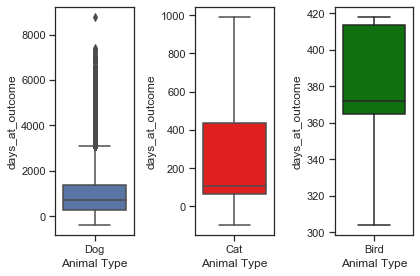

In [57]:
fig, (ax1,ax2, ax3) = plt.subplots(nrows = 1, ncols=3, sharey=False) #toggling sharey effectively changes the scale
dog_df = animal_df[animal_df['Animal Type'] == 'Dog']
cat_df = animal_df[animal_df['Animal Type'] == 'Cat']
bird_df = animal_df[animal_df['Animal Type'] == 'Bird']

sns.boxplot(dog_df['Animal Type'], dog_df['days_at_outcome'], ax = ax1, showfliers = True)
sns.boxplot(cat_df['Animal Type'], cat_df['days_at_outcome'], 
                    ax = ax2, showfliers = False, color='red')
sns.boxplot(bird_df['Animal Type'], bird_df['days_at_outcome'], 
                    ax = ax3, showfliers = False, color='green') # toggle showfliers to not show outliers
plt.tight_layout() # One way to fix the axis label problem                               

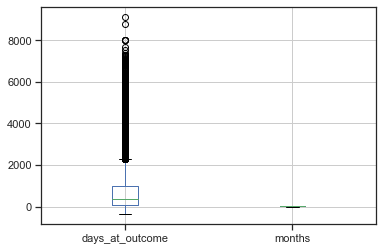

In [58]:
## Another way with Pandas
animal_df.boxplot()

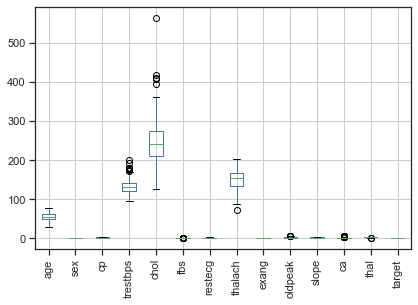

In [59]:
heart_df.boxplot()
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

In [61]:
#from sklearn.preprocessing import StandardScaler # we will get to these libraries
#ss = StandardScaler()
#ss_heart = pd.DataFrame(ss.fit_transform(heart_df)) # scale the data to better show the relationships
#ss_heart.columns = heart_df.columns
#ss_heart.boxplot()
#plt.xticks(rotation = 90)
#plt.title('Scaled heart_df boxplots')
#plt.show()

# Scatter plots!

![cats scattering](http://giphygifs.s3.amazonaws.com/media/H73nLSMPixSXC/giphy.gif)
### 3. Scatterplot - visualizing two dimensional data
Scatterplots are usually used for visualizing two dimensional data (observations with two variables). It allows us to examine the relationship between two variables, thus it is sometimes called a correlation plot. 

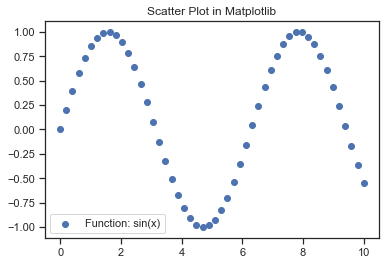

In [62]:
# generate some data -> the sine wave
x = np.linspace(0, 10)
y = np.sin(x)

plt.scatter(x, y, label = "Function: sin(x)")
plt.title('Scatter Plot in Matplotlib')
plt.legend()

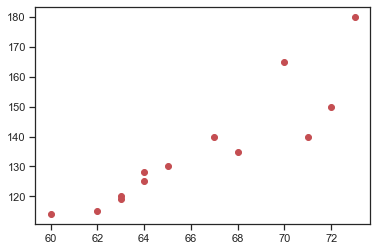

In [63]:
# examining correlation with height and weight 
height = [63,62,60,63,64,65,68,67,64,71,72,70,73]
weight = [120,115,114,119,125,130,135,140,128,140,150,165,180]
plt.plot= ([max(height), min(height)], [max(weight), min(weight)])
plt.scatter(height, weight,color = 'r', marker = 'o') #toggle marker to change shape (+,^, o)

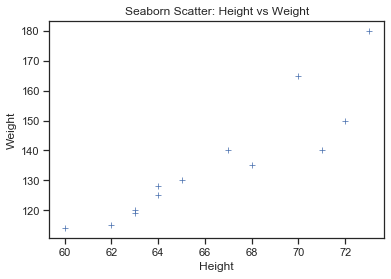

In [41]:
sns.scatterplot(height, weight, marker = '+') # similar notation to toggle markers in Seaborn
plt.title('Seaborn Scatter: Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.plot()
plt.show()

In [68]:
sns.regplot(x=(heart_df.'chol'), y=(heart_df['age']), ci = None) # toggle ci to get rid of the 95% confidence interval

SyntaxError: invalid syntax (<ipython-input-68-51b2dd53d900>, line 1)

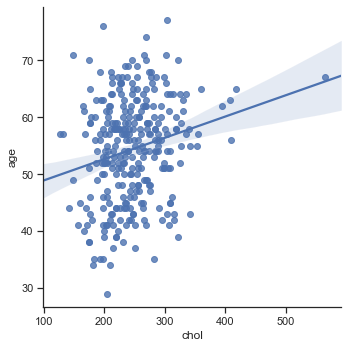

In [44]:
# lmplot is very similar, but try running type on the object.
sns.lmplot('chol','age', heart_df)

# Pairplot to the rescue!
![](https://media.giphy.com/media/FQVZk2elXU14Q/giphy.gif)

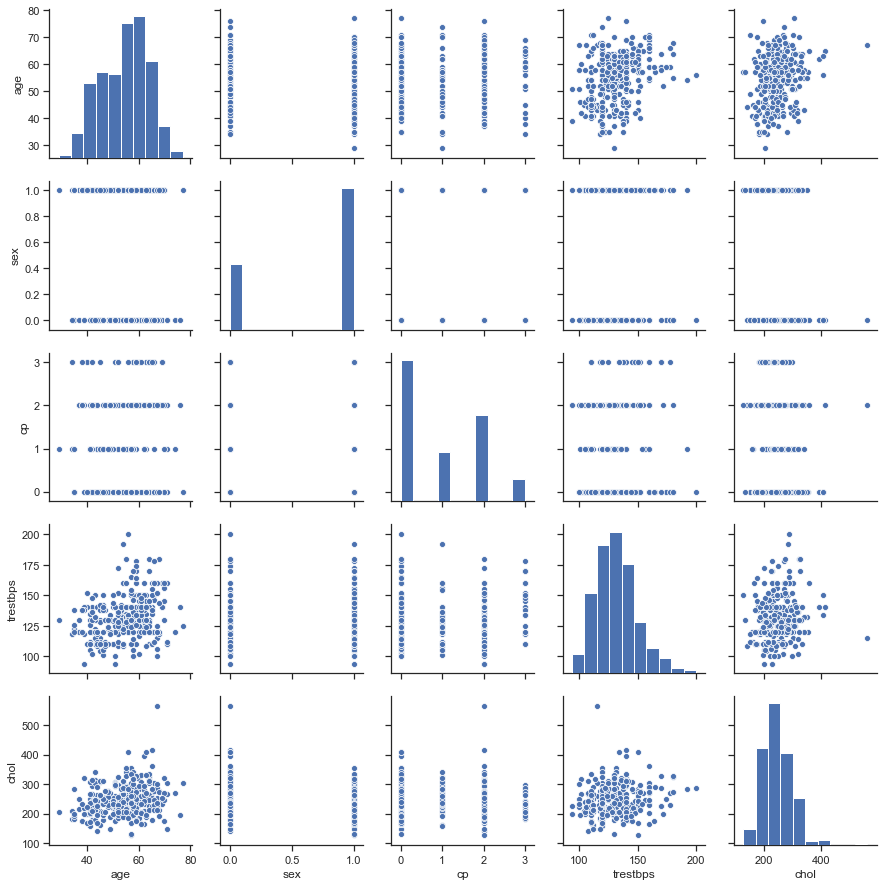

In [52]:
# Pairplot is a great way to quickly get a glimpse of the relationships
# between variables.
first_five = list(heart_df)[0:5]
sns.pairplot(heart_df[first_five])

# Correlation and Heatmaps!
![](https://media.giphy.com/media/3oKIPxua1XGPonJm3C/giphy.gif)

In [69]:
# Whereas pairplots can be somewhat subjective, correlations can give 
# us a numerical representation.
heart_df[first_five].corr()

,age,sex,cp,trestbps,chol
age,1.000000,-0.098447,-0.068653,0.279351,0.213678
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000


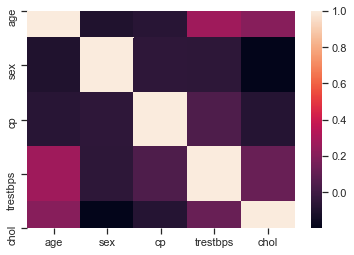

In [48]:
# We can then use the heatmap plot to give a different type of correlation
# visualization
sns.heatmap(heart_df[first_five].corr())

In [70]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bins
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,"(61.0, 77.0]"
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,"(28.952, 45.0]"
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,"(28.952, 45.0]"
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,"(45.0, 61.0]"
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,"(45.0, 61.0]"


# Layering

![cake layers](https://media.giphy.com/media/XMgCFjsCSARxK/giphy.gif)

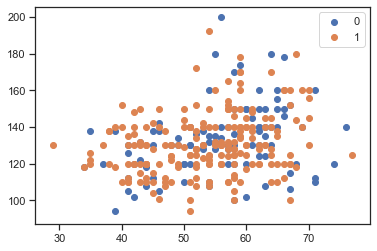

In [71]:
for key, group_indices in heart_df.groupby('sex').indices.items():
    group = heart_df.loc[group_indices]
    plt.scatter(group['age'], group['trestbps'], label = key)
    
plt.legend()

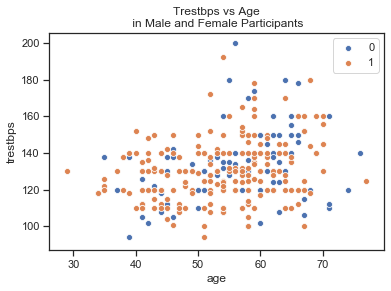

In [50]:
for key, group_indices in heart_df.groupby('sex').indices.items():
    group = heart_df.loc[group_indices]
    sns.scatterplot(group['age'], group['trestbps'], label = key)

plt.legend()
plt.title('Trestbps vs Age\n in Male and Female Participants')
plt.show()

In [51]:
heart_df['age_bins'] = pd.cut(heart_df['age'], bins = 3)
for key, group_indices in heart_df.groupby(age_bins).indices.items():
    group = heart_df.loc[group_indices]
    plt.scatter(group['age'], group['trestbps'])

NameError: name 'age_bins' is not defined

# Seaborn and fancy color warning

In [ ]:
sns.barplot(values, counts) # this looks very nice, but, we want to be intentional with our colors.


In [ ]:
# Finally, use the help function if you want a description 
# of a method's capabilities
help(plt.boxplot)